## 1. 농구포지션 예측 모델

### 1.1 데이터 불러오기

In [26]:
import pandas as pd
import numpy as np

In [27]:
basketball_data = pd.read_csv("basketball_stat.csv")

In [28]:
basketball_data

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


### 1.2 데이터 전처리

In [29]:
basketball_data.describe()

,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


In [30]:
target_df = pd.DataFrame(basketball_data, columns=['Pos'])
input_df = pd.DataFrame(basketball_data, columns=['3P', '2P', 'TRB', 'AST', 'STL', 'BLK'])
data_df = pd.concat([input_df, target_df], axis=1)
data_df.head()

,3P,2P,TRB,AST,STL,BLK,Pos
0,1.4,0.6,1.3,0.6,0.5,0.1,SG
1,0.0,4.7,7.7,1.1,1.1,1.0,C
2,0.0,2.3,4.5,0.3,0.5,0.6,C
3,0.0,0.8,2.6,0.4,0.4,0.6,C
4,1.5,3.5,4.3,3.4,0.8,0.5,SG


In [31]:
data_df.groupby('Pos').mean()

,3P,2P,TRB,AST,STL,BLK
Pos,,,,,,
C,0.366,3.798,6.968,1.408,0.588,1.112
SG,1.798,2.732,3.092,2.376,0.862,0.280


In [32]:
data_df['Pos'].value_counts()

SG    50
C     50
Name: Pos, dtype: int64

###  1.3 데이터 시각화(EDA)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

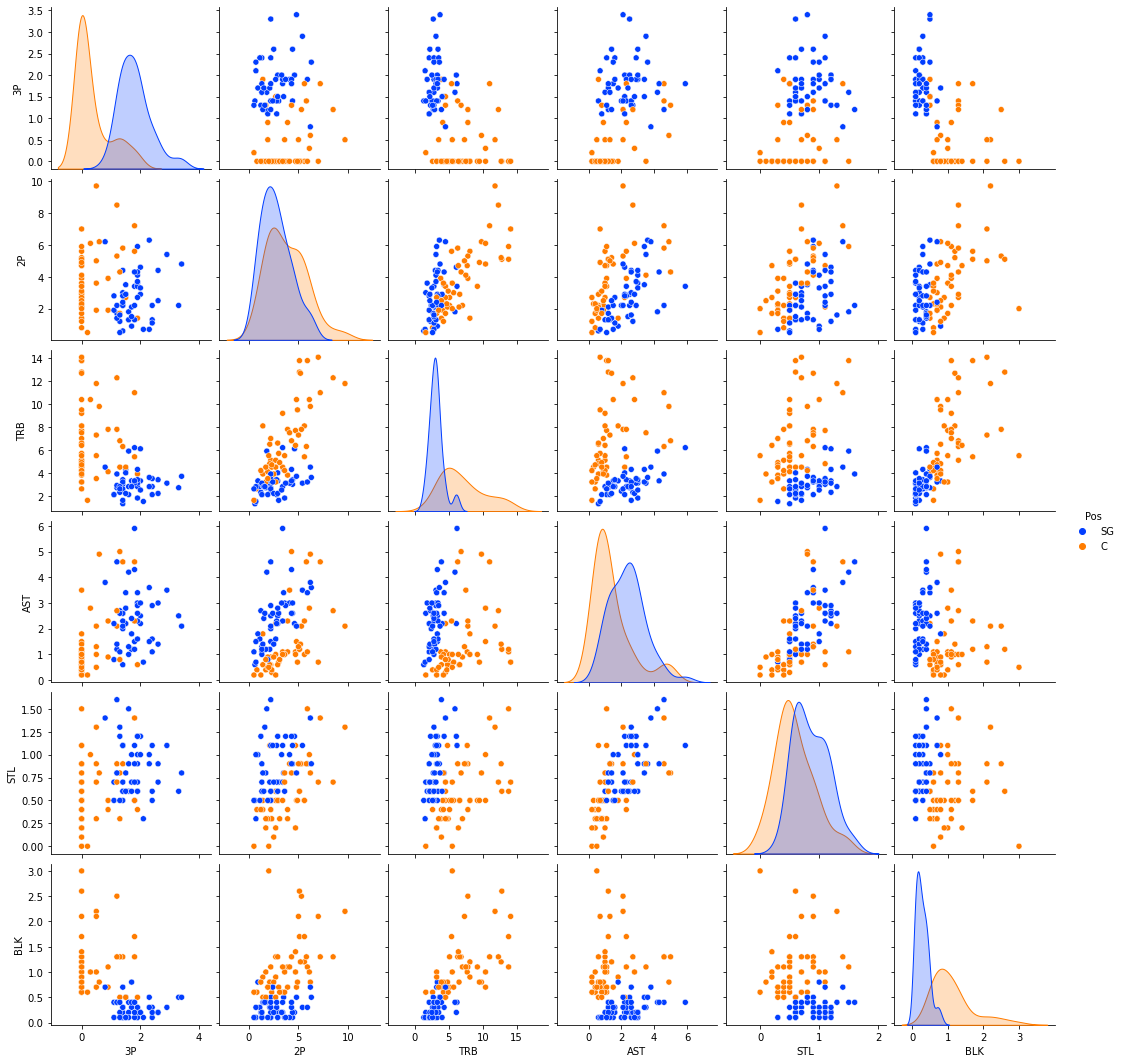

In [34]:
sns.pairplot(data_df, hue='Pos', palette='bright', )

In [35]:
corr = data_df.corr(method = 'pearson')
print(corr)

           3P        2P       TRB       AST       STL       BLK
3P   1.000000 -0.094914 -0.498036  0.485010  0.353517 -0.534588
2P  -0.094914  1.000000  0.680882  0.396094  0.353558  0.482056
TRB -0.498036  0.680882  1.000000  0.026689  0.130441  0.707542
AST  0.485010  0.396094  0.026689  1.000000  0.640802 -0.148161
STL  0.353517  0.353558  0.130441  0.640802  1.000000 -0.138208
BLK -0.534588  0.482056  0.707542 -0.148161 -0.138208  1.000000


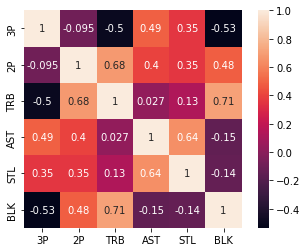

In [36]:
sns.heatmap(data=corr, square=True, annot=True, cbar=True)
plt.show()

상관관계를 보면 BLK와 TRB, 2P와 TRB의 상관관계의 절대값이 0.5를 넘으며 다소 높게 형성된것을 확인 할 수 있다. 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_data = data_df.loc[:, '3P':'BLK']
y_data = data_df.loc[:, 'Pos']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80, 6) (80,)
(20, 6) (20,)


### 1.4 모델 학습

#### 1.4.1 KNN알고리즘 활용

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_knn_pred=knn.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy: %.4f" %knn_acc)

Accuracy: 0.9500


#### 1.4.2 결정트리 활용

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [43]:
y_dtc_pred = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("정확도: %.4f" % dtc_acc)

정확도: 0.9000


#### 1.4.3 로지스틱회귀 활용

In [44]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_lrc_pred = lrc.predict(x_test)
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("정확도: %.4f" % lrc_acc)

정확도: 1.0000


### 1.5 교차검증(K-fold)

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

In [47]:
kfold = KFold(n_splits=5, shuffle = True, random_state=42)

#### 1.5.1 결정트리 교차검증

In [48]:
scores = cross_val_score(dtc, x_data, y_data, cv=kfold)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.95 0.9  0.8  0.95 0.9 ]
평균 검증 정확도: 0.9


#### 1.5.2 KNN 교차검증

In [49]:
scores = cross_val_score(knn, x_data, y_data, cv=kfold)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.95 1.   0.85 0.9  0.95]
평균 검증 정확도: 0.93


#### 1.5.3 로지스틱 회귀 교차검증

In [50]:
scores = cross_val_score(lrc, x_data, y_data, cv=kfold)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.95 1.   0.9  0.95 0.95]
평균 검증 정확도: 0.95
